In [1]:
!pip install pandas seaborn transformers tqdm numpy

In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from transformers import BartTokenizerFast

from common import *

In [3]:
dataset = json.load(open(aggregated_dataset_file, "r"))
tokenizer = BartTokenizerFast.from_pretrained("facebook/bart-base")

### Convert JSON nested dataset to CSV-like tabular format

In [4]:
tabular_dataset = []
# essentially flatmap
with tqdm(range(sum(len(c['lectures']) for c in dataset))) as progress_bar:
    for course in dataset:
        for lecture in course['lectures']:
            tabular_dataset.append({
                'from_subset': course['from_subset'],
                'course_title': course['title'],
                'course_url': course['url'],
                'lecture_title': lecture['title'],
                'transcript': lecture['transcript'],
                'transcript_length_characters': len(lecture['transcript']),
                'transcript_length_tokens': len(tokenizer(lecture['transcript'])['input_ids']),
                'description': lecture['description'],
                'description_length_characters': len(lecture['description']),
                'description_length_tokens': len(tokenizer(lecture['description'])['input_ids']),
            })
            progress_bar.update()

  0%|          | 0/1618 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (8383 > 1024). Running this sequence through the model will result in indexing errors


In [5]:
df = pd.DataFrame(tabular_dataset)
df

,from_subset,course_title,course_url,lecture_title,transcript,transcript_length_characters,transcript_length_tokens,description,description_length_characters,description_length_tokens
0,mitocw,Real Analysis,https://ocw.mit.edu/courses/18-100a-real-analy...,"LECTURE 1: SETS, SET OPERATIONS AND MATHEMATIC...",CASEY RODRIGUEZ: OK. So I have to admit this i...,34861,8383,An introduction to set theory and useful proof...,143,27
1,mitocw,Real Analysis,https://ocw.mit.edu/courses/18-100a-real-analy...,LECTURE 2: CANTOR'S THEORY OF CARDINALITY (SIZE),CASEY RODRIGUEZ: So last time we spoke about- ...,38268,9529,What does it mean for one set to be bigger tha...,166,41
2,mitocw,Real Analysis,https://ocw.mit.edu/courses/18-100a-real-analy...,LECTURE 3: CANTOR'S REMARKABLE THEOREM AND THE...,CASEY RODRIGUEZ: So here we are again. So I'm ...,35264,8529,Finishing the lecture on Cantor’s notion of ca...,202,44
3,mitocw,Real Analysis,https://ocw.mit.edu/courses/18-100a-real-analy...,LECTURE 4: THE CHARACTERIZATION OF THE REAL NU...,"CASEY RODRIGUEZ: OK, so let's finish the proof...",36843,8912,An introduction to properties of fields and or...,129,30
4,mitocw,Real Analysis,https://ocw.mit.edu/courses/18-100a-real-analy...,"LECTURE 5: THE ARCHIMEDIAN PROPERTY, DENSITY O...","CASEY RODRIGUEZ: Last time, so we're talking a...",38707,9507,We show that the real numbers satisfy the Arch...,240,51
...,...,...,...,...,...,...,...,...,...,...
1613,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,20. Fluid Dynamics and Statics and Bernoulli's...,Professor Ramamurti Shankar: This is a relativ...,60571,14732,The focus of the lecture is on fluid dynamics ...,263,55
1614,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,21. Thermodynamics,"Professor Ramamurti Shankar: Alright class, we...",64333,14719,This is the first of a series of lectures on t...,489,101
1615,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,22. The Boltzmann Constant and First Law of Th...,"So, I had to leave you in the middle of someth...",64480,15115,This lecture continues the topic of thermodyna...,268,53
1616,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,23. The Second Law of Thermodynamics and Carno...,Professor Ramamurti Shankar: What I did yester...,55343,13676,Why does a dropped egg that spatters on the fl...,419,86


In [6]:
df.dtypes

from_subset                      object
course_title                     object
course_url                       object
lecture_title                    object
transcript                       object
transcript_length_characters      int64
transcript_length_tokens          int64
description                      object
description_length_characters     int64
description_length_tokens         int64
dtype: object

In [7]:
df['from_subset'].value_counts()

yale      895
mitocw    723
Name: from_subset, dtype: int64

In [8]:
df[['from_subset', 'course_title', 'course_url', 'lecture_title', 'transcript', 'description']].describe()

,from_subset,course_title,course_url,lecture_title,transcript,description
count,1618,1618,1618,1618,1618,1618
unique,2,67,67,1606,1617,1608
top,yale,"Brains, Minds and Machines Summer Course",https://ocw.mit.edu/courses/res-9-003-brains-m...,1. Introduction,WAI CHEE DIMOCK: So just want to go back very ...,Machine learning methods used in intelligence ...
freq,895,58,58,12,2,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   from_subset                    1618 non-null   object
 1   course_title                   1618 non-null   object
 2   course_url                     1618 non-null   object
 3   lecture_title                  1618 non-null   object
 4   transcript                     1618 non-null   object
 5   transcript_length_characters   1618 non-null   int64 
 6   transcript_length_tokens       1618 non-null   int64 
 7   description                    1618 non-null   object
 8   description_length_characters  1618 non-null   int64 
 9   description_length_tokens      1618 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 126.5+ KB


### Filter transcripts with length < 500 characters
500 is chosen arbitrarily as a small minimum threshold a transcript should pass. This is to filter very short transcripts, which cannot belong to a video lecture. We can see from the transcript lengths percentiles table below that the large majority of transcripts is longer than this threshold.

In [10]:
_df_len_before = len(df)
df = df[df['transcript_length_characters'] > 500].copy()
_df_len_after = len(df)
print(f"Removed {_df_len_before - _df_len_after} short transcripts.")

Removed 0 short transcripts.


### Remove duplicate transcripts

In [11]:
_df_len_before = len(df)
df.drop_duplicates(subset=['transcript'], keep="first", inplace=True)
_df_len_after = len(df)
print(f"Removed {_df_len_before - _df_len_after} duplicate transcripts.")

Removed 1 duplicate transcripts.


### Remove duplicate descriptions

In [12]:
_df_len_before = len(df)
df.drop_duplicates(subset=['description'], keep="first", inplace=True)
_df_len_after = len(df)
print(f"Removed {_df_len_before - _df_len_after} duplicate descriptions.")

Removed 10 duplicate descriptions.


In [13]:
df[['from_subset', 'course_title', 'course_url', 'lecture_title', 'transcript', 'description']].describe()

,from_subset,course_title,course_url,lecture_title,transcript,description
count,1607,1607,1607,1607,1607,1607
unique,2,67,67,1595,1607,1607
top,yale,"Brains, Minds and Machines Summer Course",https://ocw.mit.edu/courses/res-9-003-brains-m...,1. Introduction,CASEY RODRIGUEZ: OK. So I have to admit this i...,An introduction to set theory and useful proof...
freq,893,49,49,12,1,1


In [14]:
df['from_subset'].value_counts()

yale      893
mitocw    714
Name: from_subset, dtype: int64

### Transcript lengths distribution

In [15]:
df[['transcript_length_characters', 'transcript_length_tokens']].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.979, 0.99])

,transcript_length_characters,transcript_length_tokens
count,1607.000000,1607.000000
mean,43542.171126,9785.672682
std,13846.752761,3147.946764
min,2227.000000,472.000000
25%,33917.500000,7585.500000
50%,40452.000000,9001.000000
75%,54598.000000,12222.000000
90%,62484.200000,14310.800000
95%,67501.300000,15158.100000
97.9%,72737.358000,16221.892000


As we can see from the table above, **97.9% of transcripts are within LED's 16384 maximum token length**.

In [16]:
sns.set(rc={"figure.figsize": (16, 9)})  # change seaborn plot size

<AxesSubplot: xlabel='transcript_length_characters', ylabel='Count'>

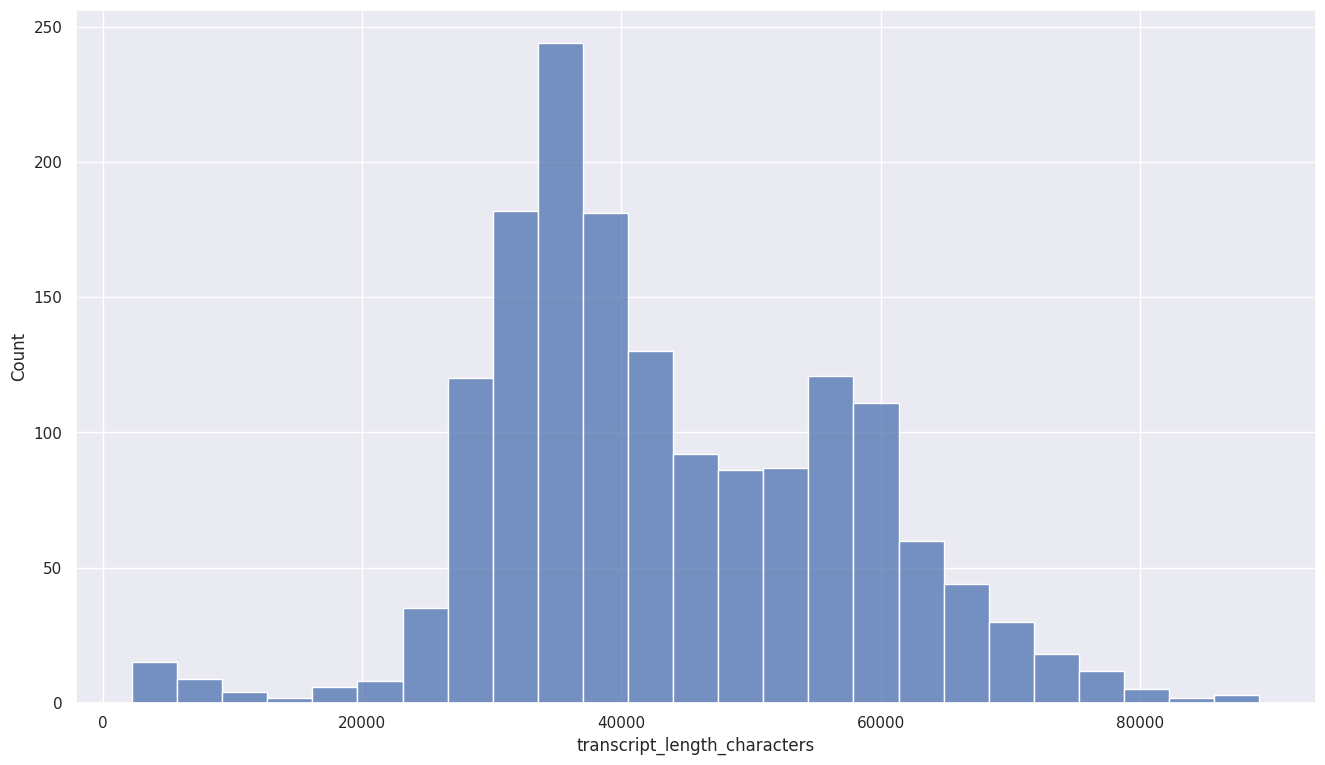

In [17]:
sns.histplot(df['transcript_length_characters'])

<AxesSubplot: xlabel='transcript_length_tokens', ylabel='Count'>

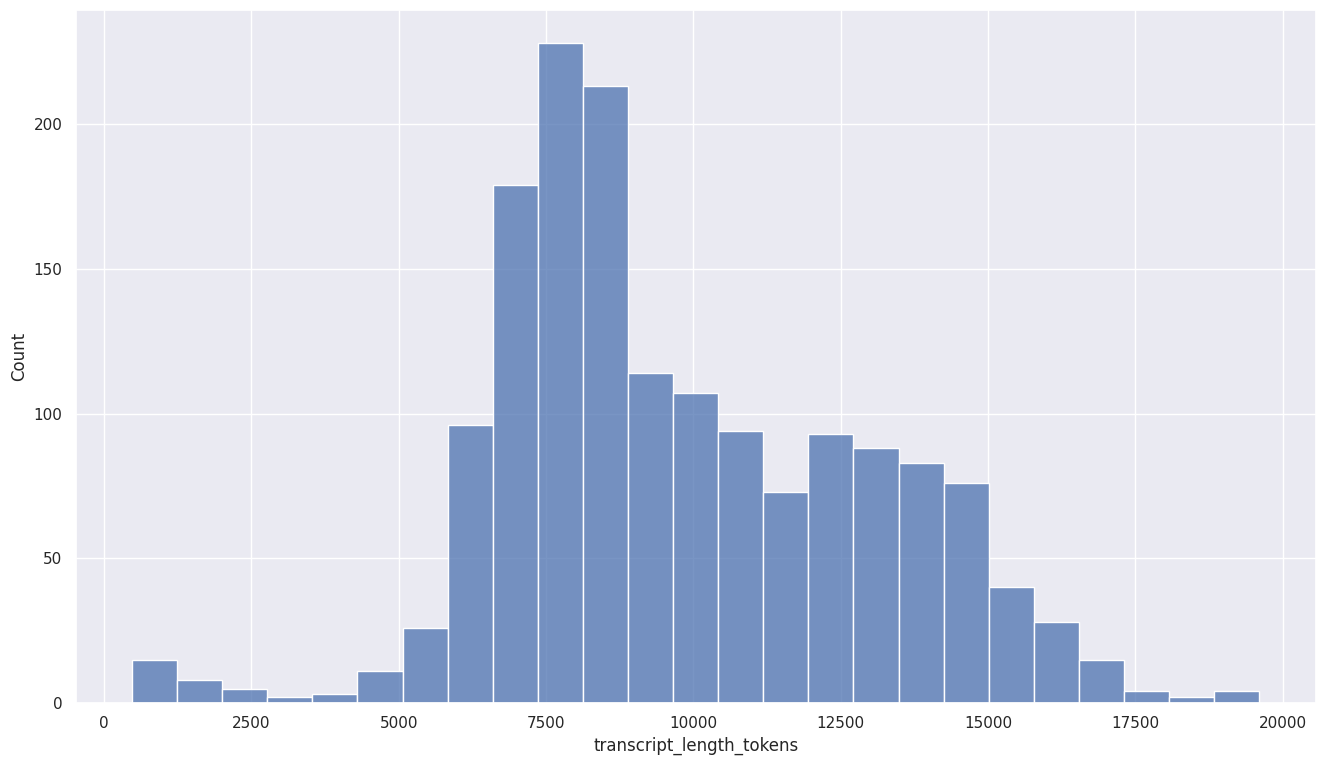

In [18]:
sns.histplot(df['transcript_length_tokens'])

### Description lengths distribution

In [19]:
df[['description_length_characters', 'description_length_tokens']].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,description_length_characters,description_length_tokens
count,1607.000000,1607.000000
mean,516.731798,103.245800
std,322.488151,63.388157
min,21.000000,6.000000
25%,242.500000,49.000000
50%,455.000000,91.000000
75%,723.000000,142.000000
90%,974.200000,191.400000
95%,1139.700000,231.000000
99%,1378.900000,280.880000


All description lengths are within 384 (or, to use a power of 2, within 512).

<AxesSubplot: xlabel='description_length_characters', ylabel='Count'>

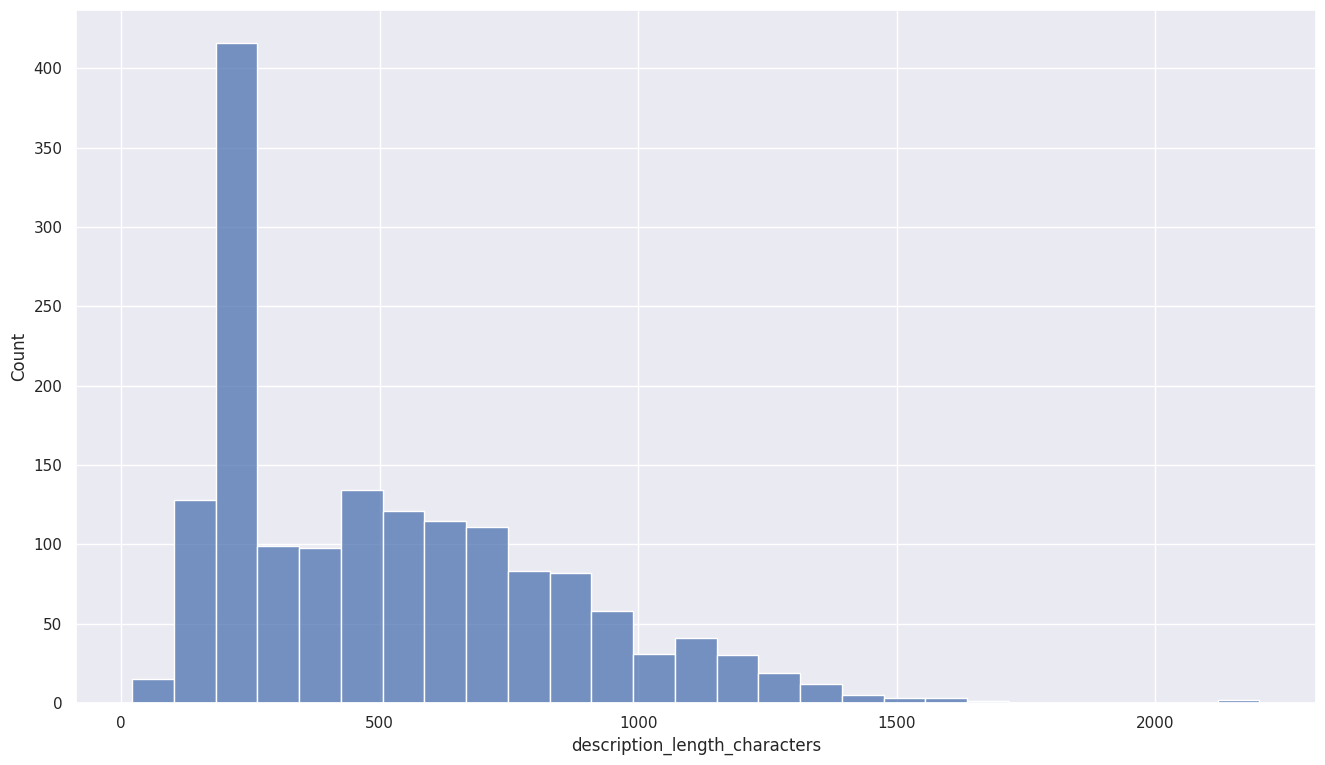

In [20]:
sns.histplot(df['description_length_characters'])

<AxesSubplot: xlabel='description_length_tokens', ylabel='Count'>

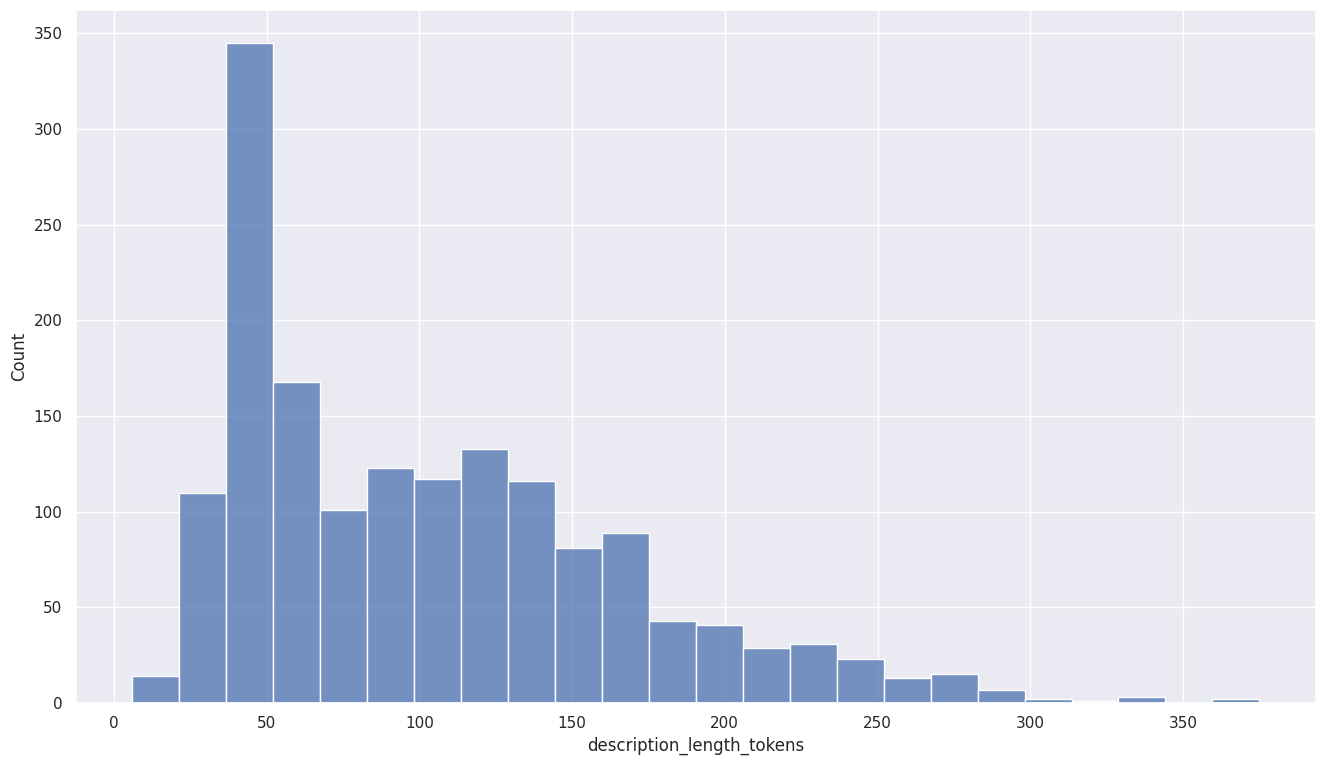

In [21]:
sns.histplot(df['description_length_tokens'])

### Save space
1. keep only "transcript" and "description" columns
2. rename them to "text" and "target"

In [22]:
df = df[['transcript', 'description']].copy()

In [23]:
df.rename(columns={'transcript': 'text', 'description': 'target'}, inplace=True)

In [24]:
df.head(2)

,text,target
0,CASEY RODRIGUEZ: OK. So I have to admit this i...,An introduction to set theory and useful proof...
1,CASEY RODRIGUEZ: So last time we spoke about- ...,What does it mean for one set to be bigger tha...


### Split dataset into train, dev, test

In [25]:
seed = 42

np.random.seed(seed)
train_split = 0.8
dev_split = test_split = 0.1

# only make test split if needed
make_test_split = True

In [26]:
if not make_test_split:
    train_split += test_split
    test_split = 0.

train, dev, test = np.split(
    df.sample(frac=1, random_state=seed),
    [int(train_split * len(df)), int((train_split + dev_split) * len(df))],
)
len(train), len(train) / len(df), len(dev), len(dev) / len(df), len(test), len(test) / len(df), len(train) + len(dev) + len(test) == len(df)

(1285,
 0.7996266334785315,
 161,
 0.1001866832607343,
 161,
 0.1001866832607343,
 True)

In [27]:
train.head(3)

,text,target
539,PROFESSOR: So the goal for today is to talk ab...,This lecture focuses on shared media networks ...
1342,Prof: Now today I am going to talk about biodi...,One can look at biodiversity from several pers...
168,ADAM MARTIN: And so today and for the remainde...,The theme for the next few lectures is the cel...


In [28]:
dev.head(3)

,text,target
555,HUGH MCMANUS: This video is intended to descri...,This video covers aspects of the Lean healthca...
667,PROF. PATRICK WINSTON: Well that's the Kodo Dr...,This lecture begins with a high-level view of ...
1322,"Prof: Okay, today we're going to talk about li...",Life history covers three main classes of trai...


In [29]:
if make_test_split:
    test.head(3)

### Save dataset as CSV files

In [30]:
train.to_csv(train_split_csv_file)
dev.to_csv(dev_split_csv_file)
if make_test_split:
    test.to_csv(test_split_csv_file)